In [1]:
!pip install tensorflow -qqq
!pip install keras -qqq
!pip install yfinance -qqq


In [3]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)


TensorFlow Version:  2.18.0


In [4]:
# Fetch TSLA data
tsla_data = yf.download('TSLA', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataframe
tsla_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [6]:
# Checking for missing values
tsla_data.isnull().sum()

# Filling missing values, if any
tsla_data.fillna(method='ffill', inplace=True)

<ipython-input-6-50dc6421a148>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data.fillna(method='ffill', inplace=True)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
tsla_data_scaled = scaler.fit_transform(tsla_data['Close'].values.reshape(-1,1))


In [8]:
X = []
y = []

for i in range(60, len(tsla_data_scaled)):
    X.append(tsla_data_scaled[i-60:i, 0])
    y.append(tsla_data_scaled[i, 0])


In [9]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout

# # Model initialization
# model = Sequential()

# # Adding the first LSTM layer
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# # Adding additional LSTM layers
# model.add(LSTM(units=50, return_sequences=True))
# model.add(LSTM(units=50))


In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))  # Only the last time step

# Adding a Dense layer to match the output shape with y_train
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.1040 - val_loss: 0.0255
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092 - val_loss: 0.0051
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0050 - val_loss: 0.0066
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039 - val_loss: 0.0085
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0053
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

In [13]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply, Flatten, BatchNormalization
import tensorflow as tf

# Input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# Adding LSTM layers with return_sequences=True
lstm_out1 = LSTM(units=50, return_sequences=True)(input_layer)
lstm_out2 = LSTM(units=50, return_sequences=True)(lstm_out1)

# Attention mechanism: Apply AdditiveAttention with proper query, key, and value
attention = AdditiveAttention(name='attention_weight')([lstm_out2, lstm_out2])

# Multiply the attention result with the LSTM output
multiply_layer = Multiply()([lstm_out2, attention])

# Permute and reshape for compatibility
permute_layer = Permute((2, 1))(multiply_layer)
reshape_layer = Reshape((-1, X_train.shape[1]))(permute_layer)

# Return to original shape
permute_back = Permute((2, 1))(reshape_layer)
reshape_back = Reshape((-1, 50))(permute_back)

# Adding Dropout and Batch Normalization after reshaping
dropout_layer = Dropout(0.2)(reshape_back)
batch_norm_layer = BatchNormalization()(dropout_layer)

# Adding a Flatten layer before the final Dense layer
flatten_layer = Flatten()(batch_norm_layer)

# Final Dense layer
output_layer = Dense(1)(flatten_layer)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1630 - val_loss: 0.0462
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0156 - val_loss: 0.0324
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0138 - val_loss: 0.0250
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - val_loss: 0.0256
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0099 - val_loss: 0.0242
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0103 - val_loss: 0.0211
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0092 - val_loss: 0.0260
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0089 - val_loss: 0.0217
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0109 - val_loss: 0.0165
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0093 - val_loss: 0.0197
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0077 - val_loss: 0.0222
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [15]:
# Assume 'data' is your preprocessed dataset
train_size = int(len(tsla_data) * 0.8)
train_data, test_data = tsla_data[:train_size], tsla_data[train_size:]


In [16]:
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 60, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 60, 50)         │         10,400 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 60, 50)         │         20,200 │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_weight          │ (None, 60, 50)         │             50 │ lstm_4[0][0],          │
│ (AdditiveAttention)       │                        │                │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 60, 50)         │              0 │ lstm_4[0][0],          │
│                           │                        │                │ attention_weight[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute (Permute)         │ (None, 50, 60)         │              0 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 50, 60)         │              0 │ permute[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute_1 (Permute)       │ (None, 60, 50)         │              0 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 60, 50)         │              0 │ permute_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 60, 50)         │              0 │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 60, 50)         │            200 │ dropout[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 3000)           │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          3,001 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 33,851 (132.23 KB)

 Trainable params: 33,751 (131.84 KB)

 Non-trainable params: 100 (400.00 B)

In [17]:
# Assuming X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0058 - val_loss: 0.0029
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025 - val_loss: 0.0062
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - val_loss: 0.0046
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

In [18]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015 - val_loss: 8.0146e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0021


In [19]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

# Callback to save the model periodically
model_checkpoint = ModelCheckpoint('/content/best_model.keras', save_best_only=True, monitor='val_loss')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='/content/logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('/content/training_log.csv')

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

# Fit the model with the callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016 - val_loss: 7.8672e-04 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012 - val_loss: 9.8673e-04 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 8.8508e-04 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0015 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012 - val_loss: 7.8697e-04 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013 - val_loss: 7.8013e-04 - learning_rate: 1.0000e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011 - val_loss: 6.9030e-04 - learning_rate: 1.0000e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010 - val_loss: 8.0076e-0

In [20]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9239e-04
Test Loss:  0.0005036485963501036


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
!pip install yfinance -qqq


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def fetch_and_prepare_stock_data(ticker='TSLA', period='3mo', interval='1d'):
    try:
        # Fetching the latest 3 months of stock data
        data = yf.download(ticker, period=period, interval=interval)

        # Selecting the 'Close' price and converting to numpy array
        closing_prices = data['Close'].values
        #print(closing_prices)

        # Check if any data is returned
        if len(closing_prices) == 0:
            raise ValueError(f"No data returned for {ticker}. Please check the ticker or internet connection.")

        # Scaling the data
        scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = scaler.fit_transform(closing_prices.reshape(-1,1))

        # Since we need the last 60 days to predict the next day, we check if we have enough data
        if len(scaled_data) < 60:
            raise ValueError(f"Not enough data to predict. Only {len(scaled_data)} days of data available. Need at least 60 days.")

        # Prepare the input for prediction (last 60 days)
        X_latest = np.array([scaled_data[-60:].reshape(60)])
        X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

        return X_latest, scaler, data

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None, None, None

# Usage
X_latest, scaler, data = fetch_and_prepare_stock_data('TSLA', '3mo', '1d')

if X_latest is not None and scaler is not None:
    # Assuming 'model' is your trained model
    predicted_stock_price = model.predict(X_latest)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
    print("Predicted Stock Prices for the next 4 days: ", predicted_stock_price)

    # You can also print some information about the fetched data
    print(f"Fetched data from {data.index[0]} to {data.index[-1]}")
    print(f"Total days of data: {len(data)}")
else:
    print("Failed to fetch and prepare data. Cannot make predictions.")

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Stock Prices for the next 4 days:  [[239.51585]]
Fetched data from 2024-06-21 00:00:00 to 2024-09-20 00:00:00
Total days of data: 64


In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.3 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Stock Prices for the next 4 days:  [239.51585 239.89021 238.70561 237.78766]
Fetched data from 2024-06-21 00:00:00 to 2024-09-20 00:00:00
Total days of data: 64


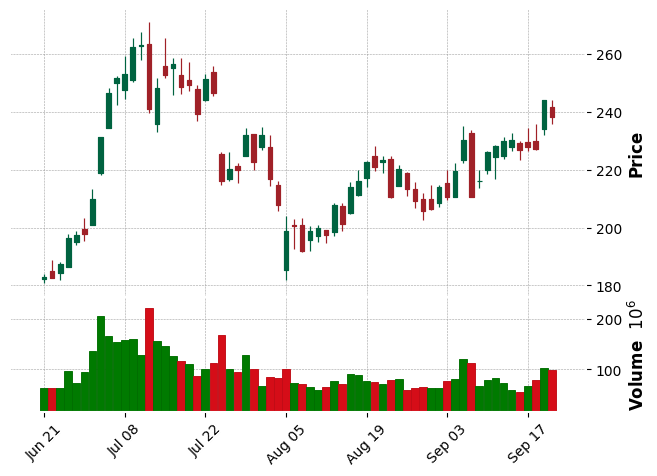

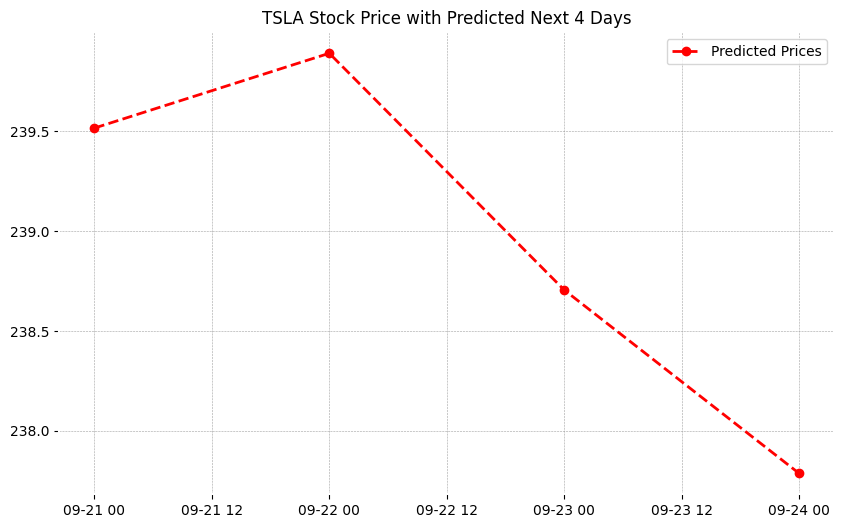

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import mplfinance as mpf

def fetch_and_prepare_stock_data(ticker='TSLA', period='3mo', interval='1d'):
    try:
        data = yf.download(ticker, period=period, interval=interval)
        closing_prices = data['Close'].values

        if len(closing_prices) == 0:
            raise ValueError(f"No data returned for {ticker}. Please check the ticker or internet connection.")

        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

        if len(scaled_data) < 60:
            raise ValueError(f"Not enough data to predict. Only {len(scaled_data)} days of data available. Need at least 60 days.")

        X_latest = np.array([scaled_data[-60:].reshape(60)])
        X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

        return X_latest, scaler, data

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None, None, None

# Usage
X_latest, scaler, data = fetch_and_prepare_stock_data('TSLA', '3mo', '1d')

if X_latest is not None and scaler is not None:
    predicted_prices = []
    current_input = X_latest

    for _ in range(4):
        predicted_stock_price = model.predict(current_input)
        predicted_prices.append(predicted_stock_price[0, 0])
        predicted_stock_price = predicted_stock_price.reshape(1, 1, 1)
        current_input = np.append(current_input[:, 1:, :], predicted_stock_price, axis=1)

    predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1)).flatten()
    print("Predicted Stock Prices for the next 4 days: ", predicted_prices)
    print(f"Fetched data from {data.index[0]} to {data.index[-1]}")
    print(f"Total days of data: {len(data)}")

    # Create a list of dates for the predictions
    last_date = data.index[-1]
    prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=4)

    # Create a DataFrame for the predicted prices
    predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

    # Plotting the actual data with mplfinance
    mpf.plot(data, type='candle', style='charles', volume=True)

    # Overlaying the predicted data
    plt.figure(figsize=(10, 6))
    plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red', label='Predicted Prices')
    plt.title("TSLA Stock Price with Predicted Next 4 Days")
    plt.legend()
    plt.show()

else:
    print("Failed to fetch and prepare data. Cannot make predictions.")


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


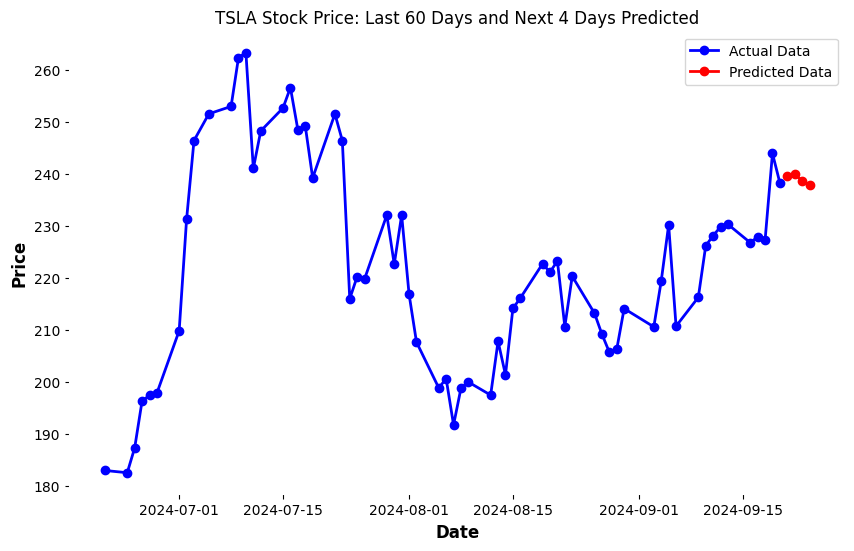

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Fetch the latest data for TSLA stock
data = yf.download('TSLA', period='3mo', interval='1d')  # Using '3mo' to ensure data is fetched

# Check if data is fetched
if data.empty:
    raise ValueError("No data fetched. Please check the ticker or internet connection.")

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    predicted_prices.append(scaler.inverse_transform(next_prediction.reshape(-1, 1))[0, 0])  # Inverse transform
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Creating a DataFrame for the predicted prices
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])

# Plotting the actual data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("TSLA Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta


def predict_stock_price(input_date):
    # Check if the input date is a valid date format
    try:
        input_date = pd.to_datetime(input_date)
    except ValueError:
        print("Invalid Date Format. Please enter date in YYYY-MM-DD format.")
        return

    # Fetch data from yfinance
    end_date = input_date
    start_date = input_date - timedelta(days=90)  # Fetch more days to ensure we have 60 trading days
    data = yf.download('TSLA', start=start_date, end=end_date)

    if len(data) < 60:
        print("Not enough historical data to make a prediction. Try an earlier date.")
        return

    # Prepare the data
    closing_prices = data['Close'].values[-60:]  # Last 60 days
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

    # Make predictions
    predicted_prices = []
    current_batch = scaled_data.reshape(1, 60, 1)

    for i in range(4):  # Predicting 4 days
        next_prediction = model.predict(current_batch)
        next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
        current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
        predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

    # Output the predictions
    for i, price in enumerate(predicted_prices, 1):
        print(f"Day {i} prediction: {price}")

# Example use
user_input = input("Enter a date (YYYY-MM-DD) to predict TSLA stock for the next 4 days: ")
predict_stock_price(user_input)


Enter a date (YYYY-MM-DD) to predict TSLA stock for the next 4 days: 2024-09-21


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Day 1 prediction: 237.7936248779297
Day 2 prediction: 238.4021453857422
Day 3 prediction: 237.55853271484375
Day 4 prediction: 237.12733459472656
